<a href="https://colab.research.google.com/github/mjohnsonperimeter/cosmology_2019/blob/master/SN_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install camb

     |████████████████████████████████| 32.0MB 122kB/s 
  Created wheel for camb: filename=camb-1.1.0-cp36-none-any.whl size=912758 sha256=2b9e0a44bd851ad724e888e65d8531b3a956db2cfa53bf3cb496c11281a3a72d
  Stored in directory: /root/.cache/pip/wheels/52/d0/76/aea0e7192efbc373eaec579a4d18909518a90a6cc10f07625b
Successfully built camb


In [2]:
import urllib
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import sys, platform, os
import camb

urllib.request.urlretrieve(url = "https://www.dropbox.com/s/js3vsjtbeirnd7y/SCPUnion2.1_mu_vs_z.txt?dl=1",filename = "SCPUnion2.1_mu_vs_z.txt")

('SCPUnion2.1_mu_vs_z.txt', <http.client.HTTPMessage at 0x7f50e4f31710>)

In [0]:
z_data=np.loadtxt(fname = 'SCPUnion2.1_mu_vs_z.txt',usecols=(1))
mag_data=np.loadtxt(fname = 'SCPUnion2.1_mu_vs_z.txt',usecols=(2))
error_data=np.loadtxt(fname = 'SCPUnion2.1_mu_vs_z.txt',usecols=(3))
error=error_data*mag_data

In [0]:
# Hubble constant in km/s/Mpc
H_0 = 67.5
# baryon and cdm fraction multiplied by h^2
omega_bh2 = 0.0224
omega_ch2 = 0.120
# Curvature
omega_k = 0.0
# Neutrino mass
nu_mass = 0.06

# Set within CAMB
pars = camb.CAMBparams()
pars.set_cosmology(H0=H_0, ombh2=omega_bh2, omch2=omega_ch2, mnu=nu_mass, omk=omega_k)
results = camb.get_background(pars)

z = np.linspace(0.01,1.5,100)
DL = results.luminosity_distance(z)
DL_lowz = ((2.99e5)/H_0)*z
dm = 5.*np.log10(DL/(1e-5))
dm_lowz = 5.*np.log10(DL_lowz/(1e-5))

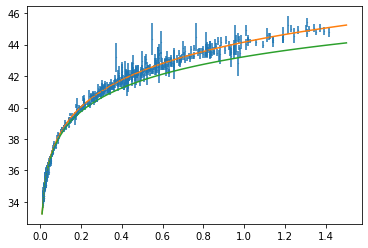

In [24]:
plt.errorbar(z_data,mag_data,error_data,fmt='o',ms=.25)
plt.plot(z,dm)
plt.plot(z,dm_lowz)

<ErrorbarContainer object of 3 artists>

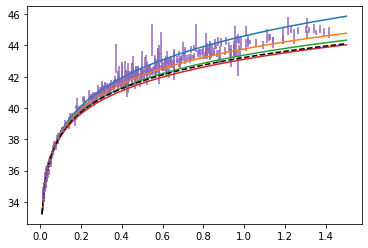

In [30]:
# Hubble constant in km/s/Mpc
H_0 = 67.5
# baryon and cdm fraction multiplied by h^2
omega_bh2 = 0.0224
omega_ch2 = 0.120
# Curvature
omega_k = 0.0
# Neutrino mass
nu_mass = 0.06

# Set within CAMB

DL_lowz = ((2.99e5)/H_0)*z
dm_lowz = 5.*np.log10(DL_lowz/(1e-5))

pars = camb.CAMBparams()
z = np.linspace(0.01,1.5,100)
omegas = np.linspace(0,.9,4)

for omega_ch2 in omegas:

  pars.set_cosmology(H0=H_0, ombh2=omega_bh2, omch2=omega_ch2, mnu=nu_mass, omk=omega_k)
  results = camb.get_background(pars)
  DL = results.luminosity_distance(z)
  dm = 5.*np.log10(DL/(1e-5))
  plt.plot(z,dm)

plt.plot(z,dm_lowz,'k--')
plt.errorbar(z_data,mag_data,error_data,fmt='o',ms=.25)

In [0]:
# Hubble constant in km/s/Mpc
H_0 = 67.5
# baryon and cdm fraction multiplied by h^2
omega_bh2 = 0.0224
omega_ch2 = 0.120
# Curvature
omega_k = 0.0
# Neutrino mass
nu_mass = 0.06

omega_matter = results.get_Omega('cdm', 0.0001)+results.get_Omega('baryon', 0.0001)
omega_rad = results.get_Omega('photon', 0.0001)+3.*results.get_Omega('nu', 0.0001)
omega_DE = results.get_Omega('de', 0.0001)

q0 = (omega_rad + 0.5*omega_matter - omega_DE)

# Set within CAMB
pars = camb.CAMBparams()
pars.set_cosmology(H0=H_0, ombh2=omega_bh2, omch2=omega_ch2, mnu=nu_mass, omk=omega_k)
results = camb.get_background(pars)

z = np.linspace(0.01,1.5,100)
DL = results.luminosity_distance(z)
DL_lowz = ((2.99e5)/H_0)*z*(1+(1-q0)*z*0.5)
dm = 5.*np.log10(DL/(1e-5))
dm_lowz = 5.*np.log10(DL_lowz/(1e-5))

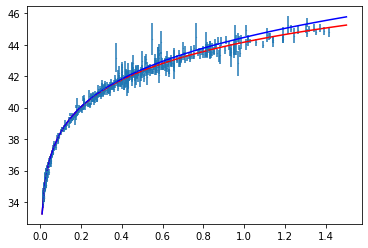

In [61]:
plt.errorbar(z_data,mag_data,error_data,fmt='o',ms=.25)
plt.plot(z,dm,'r')
plt.plot(z,dm_lowz,'b')

In [62]:
print(q0)

-0.5252983952175369


In [0]:
# Hubble constant in km/s/Mpc
H_0 = 67.5
# baryon and cdm fraction multiplied by h^2
omega_bh2 = 0.0224
omega_ch2 = 0.120
# Curvature
omega_k = 0.0
# Neutrino mass
nu_mass = 0.06

pars = camb.CAMBparams()
omegas = np.linspace(0,.4,500)
r2=np.zeros(omegas.shape[0])
i=0

for omega_ch2 in omegas:
  pars.set_cosmology(H0=H_0, ombh2=omega_bh2, omch2=omega_ch2, mnu=nu_mass, omk=omega_k)
  results = camb.get_background(pars)
  DL = results.luminosity_distance(z_data)
  dm = 5.*np.log10(DL/(1e-5))
  r2[i] = np.sum((dm - mag_data)**2)
  i+=1



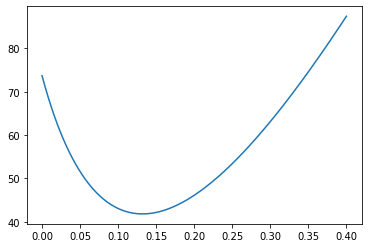

In [82]:
plt.plot(omegas,r2)

In [83]:
minindex=np.argmin(r2)
omegas[minindex]

0.13226452905811623